In [1]:
import os
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from datetime import datetime
from pathlib import Path

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# set fonts configuration - Arial
matplotlib.rcParams['font.family'] = "Open Sans"
matplotlib.rcParams['font.sans-serif'] = "Arial"

#### MCS ERA-5 environmental variables
- processed by MCS3Denvs_evolution_phase_writeout.ipynb
- contains variables at different MCS phases: mcs, non-mcs grids, 3-deg average
- PNNL 3-deg average, can be combined later for other ERA-5 variables

In [4]:
mcsenv_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/vars_env_durations/')

surface_type = 'ocean'

data_SL = xr.open_dataset(mcsenv_dir / 'envs_MCS_phase_duration.SL.{}.2001.2020.nc'.format(surface_type))
data_ML = xr.open_dataset(mcsenv_dir / 'envs_MCS_phase_duration.ML.{}.2001.2020.nc'.format(surface_type)) 
data_LL = xr.open_dataset(mcsenv_dir / 'envs_MCS_phase_duration.LL.{}.2001.2020.nc'.format(surface_type)) 
data_UL = xr.open_dataset(mcsenv_dir / 'envs_MCS_phase_duration.UL.{}.2001.2020.nc'.format(surface_type)) 
data_UUL = xr.open_dataset(mcsenv_dir / 'envs_MCS_phase_duration.UUL.{}.2001.2020.nc'.format(surface_type)) 

feat_SL = xr.open_dataset(mcsenv_dir / 'featstats_MCS_phase_duration.SL.{}.2001.2020.nc'.format(surface_type))
feat_ML = xr.open_dataset(mcsenv_dir / 'featstats_MCS_phase_duration.ML.{}.2001.2020.nc'.format(surface_type)) 
feat_LL = xr.open_dataset(mcsenv_dir / 'featstats_MCS_phase_duration.LL.{}.2001.2020.nc'.format(surface_type)) 
feat_UL = xr.open_dataset(mcsenv_dir / 'featstats_MCS_phase_duration.UL.{}.2001.2020.nc'.format(surface_type)) 
feat_UUL = xr.open_dataset(mcsenv_dir / 'featstats_MCS_phase_duration.UUL.{}.2001.2020.nc'.format(surface_type)) 

#data_SL_fnl = xr.open_dataset(mcsenv_dir / 'envsPNNL_MCS_phase_duration.SL.{}.2001.2019.nc'.format(surface_type))
#data_ML_fnl = xr.open_dataset(mcsenv_dir / 'envsPNNL_MCS_phase_duration.ML.{}.2001.2019.nc'.format(surface_type)) 
#data_LL_fnl = xr.open_dataset(mcsenv_dir / 'envsPNNL_MCS_phase_duration.LL.{}.2001.2019.nc'.format(surface_type)) 
#data_UL_fnl = xr.open_dataset(mcsenv_dir / 'envsPNNL_MCS_phase_duration.UL.{}.2001.2019.nc'.format(surface_type)) 
#data_UUL_fnl = xr.open_dataset(mcsenv_dir / 'envsPNNL_MCS_phase_duration.UUL.{}.2001.2019.nc'.format(surface_type)) 

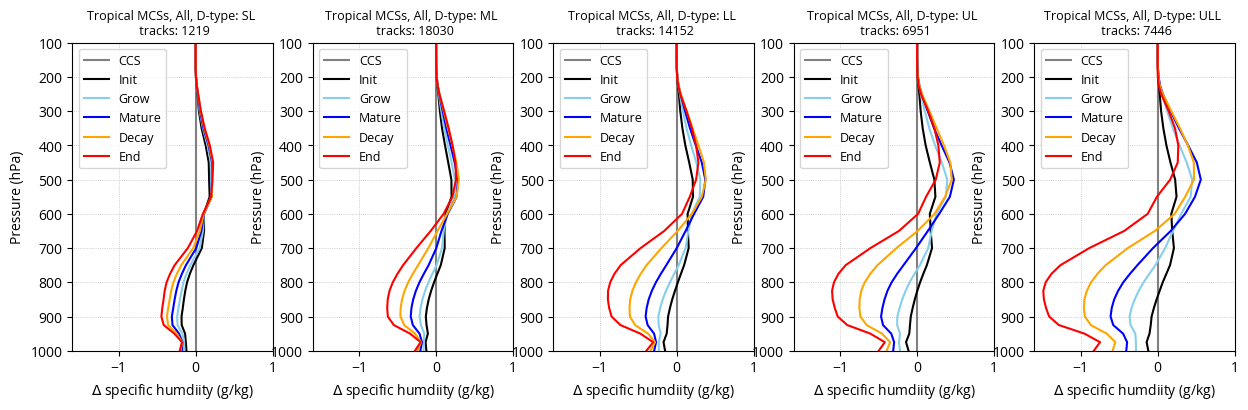

In [9]:
# 5-deg average of vertical profile of q at different phases
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,4))
ccolors=['grey','k','skyblue','b','orange','r']

for ax,data_env,dtype in zip([ax1,ax2,ax3,ax4,ax5]
                       ,[data_SL,data_ML,data_LL,data_UL,data_UUL],
                        ['SL','ML','LL','UL','ULL']):

    for p,phase in enumerate(data_env.mcs_phase.values):
        q_env_phase = data_env.sel(area_type='mcs_mean',mcs_phase=phase).q - data_env.sel(area_type='mcs_mean',mcs_phase='CCS').q
        q_mean = q_env_phase.mean('total_tracks')
        q_std = q_env_phase.std('total_tracks')/np.sqrt(len(data_env.total_tracks)) # standard error of 5-deg averaged q
        ax.plot(1000*q_mean, q_mean.level, color=ccolors[p], label=phase)
        
    ax.set_ylim([1000,100])
    ax.set_xlim([-1.6,1])
    ax.legend(fontsize=9)
    ax.set_ylabel('Pressure (hPa)',fontsize=10)
    ax.set_xlabel('$\Delta$ specific humdiity (g/kg)',fontsize=10)
    ax.set_title('Tropical MCSs, All, D-type: {} \n tracks: {}'.format(dtype,len(data_env.total_tracks)), fontsize=9)
    ax.grid(linestyle=':', lw=0.5)

In [11]:
# # 5-deg average of vertical profile of T at different phases
# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,4))
# ccolors=['grey','k','skyblue','b','orange','r']

# for ax,data_env,dtype in zip([ax1,ax2,ax3,ax4,ax5]
#                        ,[data_SL,data_ML,data_LL,data_UL,data_UUL],
#                         ['SL','ML','LL','UL','ULL']):

#     for p,phase in enumerate(data_env.mcs_phase.values):
#         q_env_phase = data_env.sel(area_type='mcs_mean',mcs_phase=phase).t- data_env.sel(area_type='mcs_mean',mcs_phase='CCS').t
#         q_mean = q_env_phase.mean('total_tracks')
#         q_std = q_env_phase.std('total_tracks')/np.sqrt(len(data_env.total_tracks)) # standard error of 5-deg averaged q
#         ax.plot(q_mean, q_mean.level, color=ccolors[p], label=phase)
        
#     ax.set_ylim([1000,100])
#     ax.set_xlim([-0.8,0.5])
#     ax.legend(fontsize=9)
#     ax.set_ylabel('Pressure (hPa)',fontsize=10)
#     ax.set_xlabel('$\Delta$ Temperature (K)',fontsize=10)
#     ax.set_title('Tropical MCSs, All, D-type: {} \n samples: {}'.format(dtype,len(data_env.total_tracks)), fontsize=9)
#     ax.grid(linestyle=':', lw=0.5)

#### ERA-5 variables 6-deg. mean, PNNL

In [ ]:
# # 5-deg average of vertical profile of q at different phases
# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,4))
# ccolors=['k','skyblue','b','orange','r']

# for ax,data_env,dtype in zip([ax1,ax2,ax3,ax4,ax5]
#                        ,[data_SL_fnl,data_ML_fnl,data_LL_fnl,data_UL_fnl,data_UUL_fnl],
#                         ['SL','ML','LL','UL','ULL']):

#     for p,phase in enumerate(data_env.mcs_phase.values):
#         rh_env_phase = data_env.sel(mcs_phase=phase).R #- data_env.sel(mcs_phase='Init').R
#         rh_mean = rh_env_phase.mean('total_tracks')
#         rh_std = rh_env_phase.std('total_tracks')/np.sqrt(len(data_env.total_tracks)) # standard error of 5-deg averaged q
#         ax.plot(rh_mean, rh_mean.level, color=ccolors[p], label=phase)
        
#     ax.set_ylim([1000,100])
#     #ax.set_xlim([-1.5,0.5])
#     ax.legend(fontsize=9)
#     ax.set_ylabel('Pressure (hPa)',fontsize=10)
#     ax.set_xlabel('$\Delta$ relative humdiity',fontsize=10)
#     ax.set_title('Tropical MCSs, All, D-type: {} \n tracks: {}'.format(dtype,len(data_env.total_tracks)), fontsize=9)
#     ax.grid(linestyle=':', lw=0.5)

In [ ]:
# # 5-deg average of vertical profile of q at different phases
# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,4))
# ccolors=['k','skyblue','b','orange','r']

# for ax,data_env,dtype in zip([ax1,ax2,ax3,ax4,ax5]
#                        ,[data_SL_fnl,data_ML_fnl,data_LL_fnl,data_UL_fnl,data_UUL_fnl],
#                         ['SL','ML','LL','UL','ULL']):

#     for p,phase in enumerate(data_env.mcs_phase.values):
#         w_env_phase = data_env.sel(mcs_phase=phase).W #- data_env.sel(mcs_phase='Init').R
#         w_mean = w_env_phase.mean('total_tracks')
#         w_std = w_env_phase.std('total_tracks')/np.sqrt(len(data_env.total_tracks)) # standard error of 5-deg averaged q
#         ax.plot(w_mean, w_mean.level, color=ccolors[p], label=phase)
        
#     ax.set_ylim([1000,100])
#     ax.set_xlim([-0.5,0.05])
#     ax.legend(fontsize=9)
#     ax.set_ylabel('Pressure (hPa)',fontsize=10)
#     ax.set_xlabel('$\Delta$ vertical velocity (Pa/s)',fontsize=10)
#     ax.set_title('Tropical MCSs, All, D-type: {} \n tracks: {}'.format(dtype,len(data_env.total_tracks)), fontsize=9)
#     ax.grid(linestyle=':', lw=0.5)

In [12]:
def plot_var_singlelayer_MCS(ax, var_name, var_unit, factor, area_type):
    """
    plot the evolution of a single-layer variable for groups of MCS durations 
    """
    ccolors=['k','y','orange','r','m']
    
    for n,(data,dtype) in enumerate(zip([data_SL,data_ML,data_LL,data_UL,data_UUL],
                        ['SL','ML','LL','UL','UUL'])):
    
        data_phase = factor*data[var_name].sel(area_type=area_type)
        data_mean = data_phase.mean('total_tracks').values
        data_std = (data_phase.std('total_tracks')/np.sqrt(len(data_phase.total_tracks))).values # standard error of 5-deg averaged q
        ax.plot(data_env.mcs_phase, data_mean, marker='o', color=ccolors[n])
        ax.set_xticklabels(['x','I','G','M','D','E'])
        #ax.fill_between(np.arange(5), data_mean-data_std, data_mean)
        #ax.fill_between(np.arange(5), data_mean, data_mean+data_std)

        ax.set_ylabel('{} ({})'.format(var_name, var_unit),fontsize=10)
        ax.set_title('{}'.format(var_name, fontsize=9))
        ax.grid(linestyle=':', lw=0.5) 
        
    ax.legend(['SL','ML','LL','UL','UUL'],fontsize=9)

In [13]:
def plot_var_MCSfeats(ax, var_name, var_unit, factor):
    """
    plot the evolution of a single-layer variable for groups of MCS durations 
    """
    ccolors=['k','y','orange','r','m']
    
    for n,(data,dtype) in enumerate(zip([feat_SL,feat_ML,feat_LL,feat_UL,feat_UUL],
                        ['SL','ML','LL','UL','UUL'])):
    
        data_phase = factor*data[var_name]
        data_mean = data_phase.mean('total_tracks')
        data_std = data_phase.std('total_tracks')/np.sqrt(len(data_phase.total_tracks)) # standard error of 5-deg averaged q
        ax.plot(data_env.mcs_phase, data_mean, marker='o', color=ccolors[n])
        ax.set_xticklabels(['x','I','G','M','D','E'])

        ax.set_ylabel('{} ({})'.format(var_name, var_unit),fontsize=10)
        ax.set_title('{}'.format(var_name, fontsize=9))
        ax.grid(linestyle=':', lw=0.5) 
        
    ax.legend(['SL','ML','LL','UL','UUL'],fontsize=9)

In [14]:
def plot_var_singlelayer_PNNL(ax, var_name, var_unit, factor):
    """
    plot the evolution of a single-layer variable for groups of MCS durations 
    """
    ccolors=['k','y','orange','r','m']
    
    for n,(data,dtype) in enumerate(zip([data_SL_fnl,data_ML_fnl,data_LL_fnl,data_UL_fnl,data_UUL_fnl],
                        ['SL','ML','LL','UL','UUL'])):
    
        data_phase = factor*data[var_name]
        data_mean = data_phase.mean('total_tracks')
        data_std = data_phase.std('total_tracks')/np.sqrt(len(data_phase.total_tracks)) # standard error of 5-deg averaged q
        ax.plot(data_env.mcs_phase, data_mean, marker='o', color=ccolors[n])

        ax.set_ylabel('{} ({})'.format(var_name, var_unit),fontsize=10)
        ax.set_title('{}'.format(var_name, fontsize=9))
        ax.grid(linestyle=':', lw=0.5) 
        
    ax.legend(['SL','ML','LL','UL','UUL'],fontsize=9)

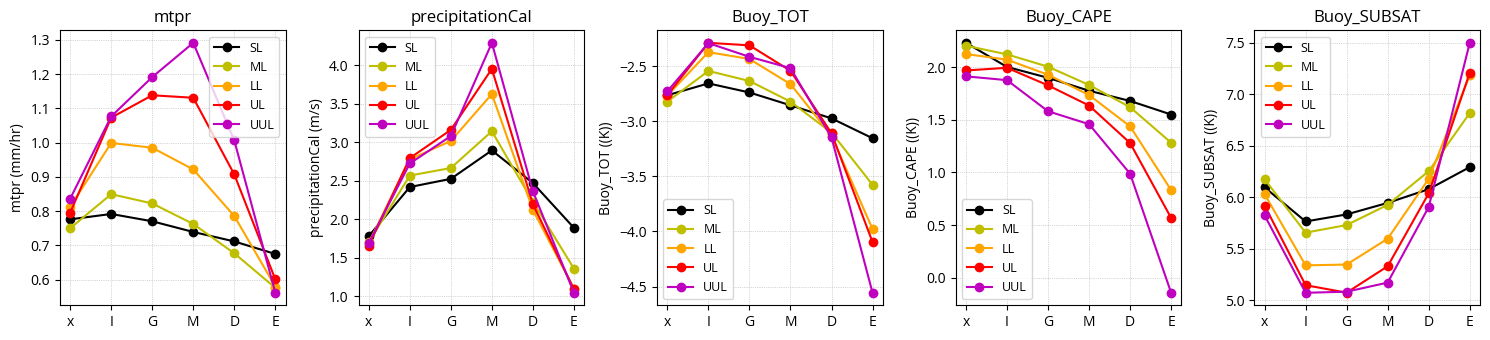

In [19]:
# multivariate analysis - MCS properties, precip, ccs area
var_name_list = ['mtpr','precipitationCal','Buoy_TOT','Buoy_CAPE','Buoy_SUBSAT']
factor_list = [1,1,340*3/9.8,340*3/9.8/0.4,340*3/9.8/0.6]
var_unit_list = ['mm/hr','mm/hr','K','K','K']

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,3.5))

for ax,var_name,var_unit,factor in zip([ax1,ax2,ax3,ax4,ax5],var_name_list, var_unit_list, factor_list):
    plot_var_singlelayer_MCS(ax,var_name,var_unit,factor,area_type='mcs_mean') # mcs grids
plt.tight_layout()

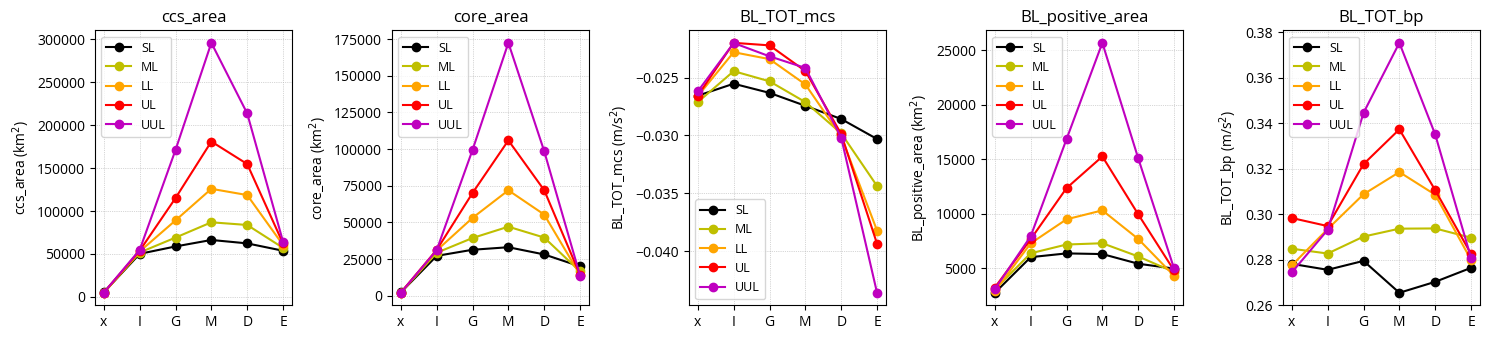

In [18]:
# multivariate analysis - MCS features, ccs area, buoy+ area
var_name_list = ['ccs_area','core_area','BL_TOT_mcs','BL_positive_area','BL_TOT_bp']
factor_list = [1,1,1,625,340*3/9.8]
var_unit_list = ['km$^2$','km$^2$','m/s$^{2}$','km$^2$','(K)']

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,3.5))

for ax,var_name,var_unit,factor in zip([ax1,ax2,ax3,ax4,ax5],var_name_list, var_unit_list, factor_list):
    plot_var_MCSfeats(ax,var_name,var_unit,factor) # 5-deg average
plt.tight_layout()

In [ ]:
# # multivariate analysis - shear magnitude at different vertical layers
# var_name_list = ['shear_mag_0to2km','shear_mag_0to4km','shear_mag_0to6km','shear_mag_4to8km','shear_mag_6to10km']
# factor_list = [1,1,1,1,1]
# var_unit_list = ['m/s','m/s','m/s','m/s','m/s']

# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,3.5))

# for ax,var_name,var_unit,factor in zip([ax1,ax2,ax3,ax4,ax5],var_name_list, var_unit_list, factor_list):
#     plot_var_singlelayer_PNNL(ax,var_name,var_unit,factor)
# plt.tight_layout()

In [ ]:
# # multivariate analysis - surface conditions 
# var_name_list = ['SSTK','IE','ISHF','SP','VAR_10U']
# factor_list = [1,1,1,1,1]
# var_unit_list = ['K','kg m$^{-2}$ s$^{-1}$','W m$^{-2}$','Pa','m/s']

# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,3.5))

# for ax,var_name,var_unit,factor in zip([ax1,ax2,ax3,ax4,ax5],var_name_list, var_unit_list, factor_list):
#     plot_var_singlelayer_PNNL(ax,var_name,var_unit,factor)
# plt.tight_layout()

In [ ]:
# # multivariate analysis - avaialbe energy, instability
# var_name_list = ['CAPE','MUCAPE','MUCIN','LFC','EL']
# factor_list = [1,1,1,1,1]
# var_unit_list = ['J/kg','J/kg','J/kg','m','m']

# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,3.5))

# for ax,var_name,var_unit,factor in zip([ax1,ax2,ax3,ax4,ax5],var_name_list, var_unit_list, factor_list):
#     plot_var_singlelayer_PNNL(ax,var_name,var_unit,factor)
# plt.tight_layout()

In [ ]:
# # multivariate analysis - veritcal integral, CSF, TCWV,  VIWVD
# var_name_list = ['CSF','TCWV','VIWVD','w_850mb','w_500mb']
# factor_list = [1,1,-3600,1,1]
# var_unit_list = ['%','mm','kg m$^{-2}$ hr$^{-1}$','Pa/s','Pa/s']

# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,3.5))

# for ax,var_name,var_unit,factor in zip([ax1,ax2,ax3,ax4,ax5],var_name_list, var_unit_list, factor_list):
#     plot_var_singlelayer_PNNL(ax,var_name,var_unit,factor)
# plt.tight_layout()

#### Land MCSs 
- same analysis but for MCSs over land

In [21]:
mcsenv_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/vars_env_durations/')

surface_type = 'land'

data_SL = xr.open_dataset(mcsenv_dir / 'envs_MCS_phase_duration.SL.{}.2001.2020.nc'.format(surface_type))
data_ML = xr.open_dataset(mcsenv_dir / 'envs_MCS_phase_duration.ML.{}.2001.2020.nc'.format(surface_type)) 
data_LL = xr.open_dataset(mcsenv_dir / 'envs_MCS_phase_duration.LL.{}.2001.2020.nc'.format(surface_type)) 
data_UL = xr.open_dataset(mcsenv_dir / 'envs_MCS_phase_duration.UL.{}.2001.2020.nc'.format(surface_type)) 
data_UUL = xr.open_dataset(mcsenv_dir / 'envs_MCS_phase_duration.UUL.{}.2001.2020.nc'.format(surface_type)) 

feat_SL = xr.open_dataset(mcsenv_dir / 'featstats_MCS_phase_duration.SL.{}.2001.2020.nc'.format(surface_type))
feat_ML = xr.open_dataset(mcsenv_dir / 'featstats_MCS_phase_duration.ML.{}.2001.2020.nc'.format(surface_type)) 
feat_LL = xr.open_dataset(mcsenv_dir / 'featstats_MCS_phase_duration.LL.{}.2001.2020.nc'.format(surface_type)) 
feat_UL = xr.open_dataset(mcsenv_dir / 'featstats_MCS_phase_duration.UL.{}.2001.2020.nc'.format(surface_type)) 
feat_UUL = xr.open_dataset(mcsenv_dir / 'featstats_MCS_phase_duration.UUL.{}.2001.2020.nc'.format(surface_type)) 

# data_SL_fnl = xr.open_dataset(mcsenv_dir / 'envsPNNL_MCS_phase_duration.SL.{}.2001.2019.nc'.format(surface_type))
# data_ML_fnl = xr.open_dataset(mcsenv_dir / 'envsPNNL_MCS_phase_duration.ML.{}.2001.2019.nc'.format(surface_type)) 
# data_LL_fnl = xr.open_dataset(mcsenv_dir / 'envsPNNL_MCS_phase_duration.LL.{}.2001.2019.nc'.format(surface_type)) 
# data_UL_fnl = xr.open_dataset(mcsenv_dir / 'envsPNNL_MCS_phase_duration.UL.{}.2001.2019.nc'.format(surface_type)) 
# data_UUL_fnl = xr.open_dataset(mcsenv_dir / 'envsPNNL_MCS_phase_duration.UUL.{}.2001.2019.nc'.format(surface_type)) 

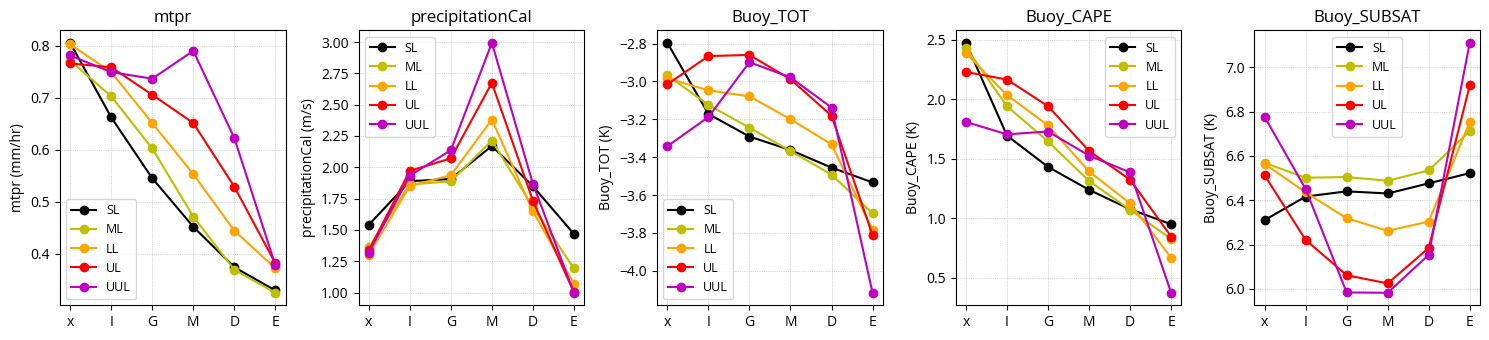

In [23]:
# multivariate analysis - MCS properties, precip, ccs area
var_name_list = ['mtpr','precipitationCal','Buoy_TOT','Buoy_CAPE','Buoy_SUBSAT']
factor_list = [1,1,340*3/9.8,340*3/9.8/0.4,340*3/9.8/0.6]
var_unit_list = ['mm/hr','mm/hr','K','K','K']

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,3.5))

for ax,var_name,var_unit,factor in zip([ax1,ax2,ax3,ax4,ax5],var_name_list, var_unit_list, factor_list):
    plot_var_singlelayer_MCS(ax,var_name,var_unit,factor,area_type='mcs_mean') # 5-deg average
plt.tight_layout()

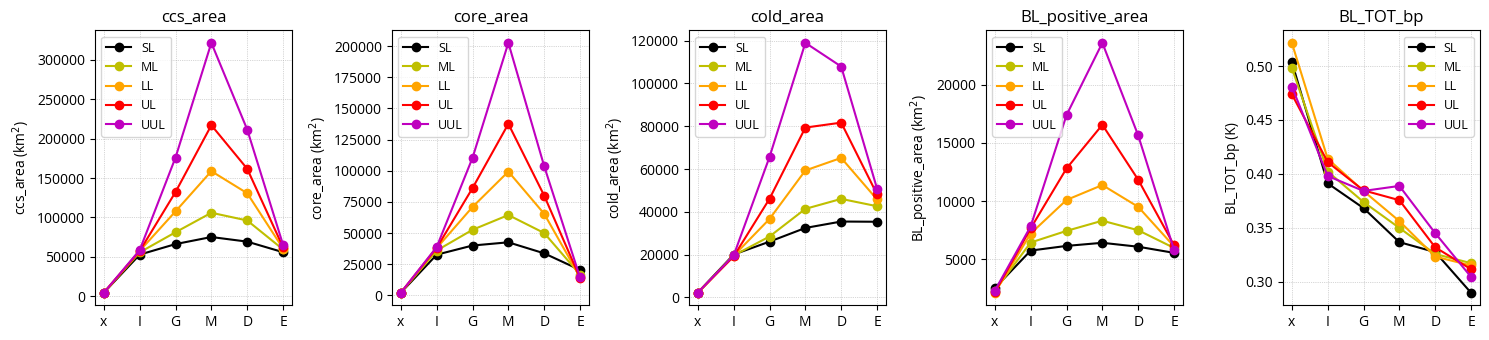

In [24]:
# multivariate analysis - MCS features, ccs area, buoy+ area
var_name_list = ['ccs_area','core_area','cold_area','BL_positive_area','BL_TOT_bp']
factor_list = [1,1,1,625,340*3/9.8]
var_unit_list = ['km$^2$','km$^2$','km$^2$','km$^2$','K']

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,3.5))

for ax,var_name,var_unit,factor in zip([ax1,ax2,ax3,ax4,ax5],var_name_list, var_unit_list, factor_list):
    plot_var_MCSfeats(ax,var_name,var_unit,factor) # 5-deg average
plt.tight_layout()

In [ ]:
# # multivariate analysis - shear magnitude at different vertical layers
# var_name_list = ['shear_mag_0to2km','shear_mag_0to4km','shear_mag_0to6km','shear_mag_4to8km','shear_mag_6to10km']
# factor_list = [1,1,1,1,1]
# var_unit_list = ['m/s','m/s','m/s','m/s','m/s']

# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,3.5))

# for ax,var_name,var_unit,factor in zip([ax1,ax2,ax3,ax4,ax5],var_name_list, var_unit_list,factor_list):
#     plot_var_singlelayer_PNNL(ax,var_name,var_unit,factor)
# plt.tight_layout()

In [ ]:
# # multivariate analysis - veritcal integral, CSF, TCWV,  VIWVD
# var_name_list = ['CSF','TCWV','VIWVD','w_850mb','w_500mb']
# factor_list = [1,1,-3600,-1,-1]
# var_unit_list = ['%','mm','kg m$^{-2}$ hr$^{-1}$','Pa/s','Pa/s']

# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,3.5))

# for ax,var_name,var_unit,factor in zip([ax1,ax2,ax3,ax4,ax5],var_name_list, var_unit_list, factor_list):
#     plot_var_singlelayer_PNNL(ax,var_name,var_unit,factor)
# plt.tight_layout()